<a href="https://colab.research.google.com/github/wulanasyifaa/K-Means-Clustering/blob/main/K_Means_Clustering_Tenaga_Kesehatan_Kota_Semarang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from factor_analyzer.factor_analyzer import calculate_kmo, calculate_bartlett_sphericity
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from scipy.spatial import ConvexHull

# **Data Preparation**

In [ ]:
df = pd.read_excel("/content/Jumlah Tenaga Kesehatan Menurut Kecamatan di Kota Semarang, 2023.xlsx")  # Upload file ke Colab
df

,Kecamatan,Tenaga Kebidanan,Tenaga Kefarmasian,Tenaga Medis
0,Mijen,51,54,75
1,Gunung Pati,90,133,62
2,Banyumanik,80,186,351
3,Gajah Mungkur,25,137,170
4,Semarang Selatan,26,146,203
5,Candisari,22,107,99
6,Tembalang,161,274,220
7,Pedurungan,90,453,419
8,Genuk,31,112,101
9,Gayamsari,17,81,87


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Kecamatan           16 non-null     object
 1   Tenaga Kebidanan    16 non-null     int64 
 2   Tenaga Kefarmasian  16 non-null     int64 
 3   Tenaga Medis        16 non-null     int64 
 4   Cluster             16 non-null     int32 
dtypes: int32(1), int64(3), object(1)
memory usage: 708.0+ bytes


Dataset ini berisi data jumlah tenaga kesehatan di 16 kecamatan di Kota Semarang, yang terdiri dari:

* Tenaga Kebidanan
* Tenaga Kefarmasian
* Tenaga Medis

# **Deskriptive Statistics**

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Tenaga Kebidanan,16.0,46.5000,42.700507,5.0,15.00,28.5,74.75,161.0
Tenaga Kefarmasian,16.0,144.6875,103.346484,41.0,75.75,122.5,165.00,453.0
Tenaga Medis,16.0,168.1250,109.134092,44.0,93.75,134.0,207.25,419.0


* Pada variabel tenaga kebidanan, didapat bahwa rata-ratanya adalah 46,5000 dengan standar deviasi sebesar 42,700507. Jumlah tenaga kebidanan paling sedikit adalah 5 dan paling banyak adalah 161 dalam satu kecamatan.
* Pada variabel tenaga kefarmasian, didapat bahwa rata-ratanya adalah 144,6875 dengan standar deviasi sebesar 103,346484. Jumlah tenaga kefarmasian paling sedikit adalah 41 dan paling banyak adalah 453 dalam satu kecamatan.
* Pada variabel tenaga medis, didapat bahwa rata-ratanya adalah 168,1250 dengan standar deviasi sebesar 109,134092. Jumlah tenaga medis paling sedikit adalah 44 dan paling banyak adalah 419 dalam satu kecamatan.


# **Data Standardization - Z-Score**

In [ ]:
# Pilih hanya kolom numerik
X = df.select_dtypes(include='number')

# Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Konversi kembali ke DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df

,Tenaga Kebidanan,Tenaga Kefarmasian,Tenaga Medis
0,0.108841,-0.906288,-0.881293
1,1.052133,-0.116799,-1.004319
2,0.810263,0.412857,1.730646
3,-0.520020,-0.076825,0.017744
4,-0.495833,0.013117,0.330041
5,-0.592581,-0.376631,-0.654168
6,2.769407,1.292288,0.490921
7,1.052133,3.081128,2.374167
8,-0.374898,-0.326663,-0.635241
9,-0.713515,-0.636463,-0.767730


Berdasarkan statistik deskriptif, standarisasi data diperlukan karena setiap variabel memiliki skala pengukuran yang berbeda-beda secara signifikan. Perbedaan skala ini dapat menyebabkan ketimpangan kontribusi antar variabel dalam analisis, terutama pada metode seperti clustering yang sangat bergantung pada jarak antar data.

Dengan menggunakan standarisasi z-score, setiap variabel akan dikonversi ke skala yang memiliki rata-rata 0 dan standar deviasi 1. Hal ini memastikan bahwa seluruh variabel memiliki kontribusi yang seimbang dalam analisis, sehingga hasil yang diperoleh menjadi lebih adil dan akurat.

# **KMO Test & Bartlett Test**

In [ ]:
kmo_all, kmo_model = calculate_kmo(X_scaled_df)
chi_square_value, p_value = calculate_bartlett_sphericity(X_scaled_df)

print("KMO Model:", kmo_model)
print("Bartlett’s Test Chi-square:", chi_square_value)
print("Bartlett’s Test p-value:", p_value)

KMO Model: 0.5823926033312605
Bartlett’s Test Chi-square: 23.176108827017483
Bartlett’s Test p-value: 3.7109571179079586e-05


Didapatkan nilai KMO Model (0,7747) > 0,5 dan nilai Bartlett’s Test p-value (3,7109×10^(-5)) < 0,5, sehingga pada taraf signifikansi α = 5%, dapat disimpulkan bahwa sampel yang digunakan untuk analisis sudah memadai dan mewakili populasinya.

# **Multicolinearity Check**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd
# Tambahkan konstanta ke data
X_scaled_const = add_constant(X_scaled_df)

# Hitung VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X_scaled_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled_const.values, i) for i in range(X_scaled_const.shape[1])]

vif_data

,Feature,VIF
0,const,1.000000
1,Tenaga Kebidanan,2.025919
2,Tenaga Kefarmasian,4.506776
3,Tenaga Medis,2.997758


Berdasarkan output didapatkan nilai Variance Inflation Factor (VIF) untuk seluruh variabel yang dianalisis lebih kecil dari 10. Maka dapat disimpulkan bahwa asumsi non-multikolinieritas terpenuhi untuk seluruh variabel.

# **Silhouette Coefficient**

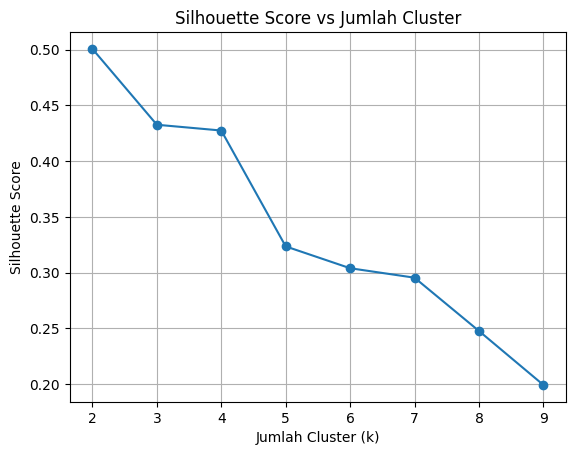

K = 2, Silhouette Score = 0.5007
K = 3, Silhouette Score = 0.4326
K = 4, Silhouette Score = 0.4275
K = 5, Silhouette Score = 0.3234
K = 6, Silhouette Score = 0.3039
K = 7, Silhouette Score = 0.2954
K = 8, Silhouette Score = 0.2475
K = 9, Silhouette Score = 0.1991


In [ ]:
scores = []
K_range = range(2, 10)

for k in K_range:
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(X_scaled_df)
    score = silhouette_score(X_scaled_df, labels)
    scores.append(score)

plt.plot(K_range, scores, marker='o')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Jumlah Cluster')
plt.grid(True)

# Mengubah label sumbu x menjadi angka bulat
plt.xticks(K_range)

plt.show()

# Tampilkan nilai silhouette
for i, score in enumerate(scores, 2):
    print(f'K = {i}, Silhouette Score = {score:.4f}')

Perhitungan nilai silhouette score dilakukan untuk dataset dengan jumlah nilai k = 1 sampai dengan k = 10. Didapatkan bahwa titik tertinggi atau silhouette score tertinggi berada pada saat jumlah cluster (k) = 2 dengan nilai Silhouette Score sebesar 0.5007. Maka, dapat disimpulkan bahwa, jumlah cluster optimal untuk dataset ini adalah 2.

# **K-Means Clustering (k=2)**

In [ ]:
# Inisialisasi dan fit KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled_df)+1

# Jumlah anggota tiap cluster
cluster_counts = df['Cluster'].value_counts().sort_index()
print("Jumlah anggota tiap cluster:")
print(cluster_counts)

Jumlah anggota tiap cluster:
Cluster
1    11
2     5
Name: count, dtype: int64


Dari cluster yang terbentuk, dialokasikan 11 kecamatan ke dalam cluster 1 dan 5 kecamatan ke dalam cluster 2. Lebih dari setengah kecamatan termasuk ke dalam cluster 1, sehingga dapat dikatakan bahwa tenaga kesehatan Kota Semarang secara keseluruhan memiliki karakteristik yang mirip dengan cluster 1.

In [ ]:
# Anggota masing-masing cluster (nama kecamatan)
print(df[['Kecamatan', 'Cluster']].sort_values(by='Cluster'))

           Kecamatan  Cluster
0              Mijen        1
1        Gunung Pati        1
3      Gajah Mungkur        1
4   Semarang Selatan        1
5          Candisari        1
10    Semarang Timur        1
9          Gayamsari        1
8              Genuk        1
12   Semarang Tengah        1
14              Tugu        1
11    Semarang Utara        1
2         Banyumanik        2
7         Pedurungan        2
6          Tembalang        2
13    Semarang Barat        2
15          Ngaliyan        2


Cluster 1 terdiri dari 11 kecamatan, yaitu Kecamatan Mijen, Gunung Pati, Gajah Mungkur, Semarang Selatan, Candisari, Semarang Timur, Gayamsari, Genuk, Semarang Tengah, Tugu, dan Semarang Utara sedangkan cluster 2 terdiri dari 5 kecamatan, yaitu Kecamatan Banyumanik, Pedurungan, Tembalang, Semarang Barat, dan Ngaliyan

In [ ]:
cluster_means = df.select_dtypes(include='number').groupby('Cluster').mean()
cluster_means

,Tenaga Kebidanan,Tenaga Kefarmasian,Tenaga Medis
Cluster,,,
1,26.636364,94.0,109.545455
2,90.200000,256.2,297.000000


Cluster 1 memiliki rata-rata jumlah tenaga kesehatan yang relatif lebih rendah, ditunjukkan oleh nilai yang lebih kecil pada hampir semua jenis tenaga kesehatan seperti tenaga kebidanan, tenaga kefarmasian, dan tenaga medis. Hal ini menunjukkan bahwa wilayah-wilayah pada cluster 1 cenderung memiliki kapasitas layanan kesehatan yang lebih rendah dibandingkan cluster 2, sehingga perlu mendapatkan perhatian lebih dalam hal penambahan tenaga kesehatan dan peningkatan layanan. Sedangkan, kecamatan dalam cluster 2 memiliki rata-rata jumlah tenaga kesehatan yang lebih tinggi dibandingkan cluster 1, terutama pada tenaga kefarmasia dan tenaga medis. Hal ini menunjukkan bahwa kecamatan dalam cluster 2 memiliki potensi layanan kesehatan yang lebih baik dan lebih siap dalam mendukung pelayanan kesehatan masyarakat di Kota Semarang.

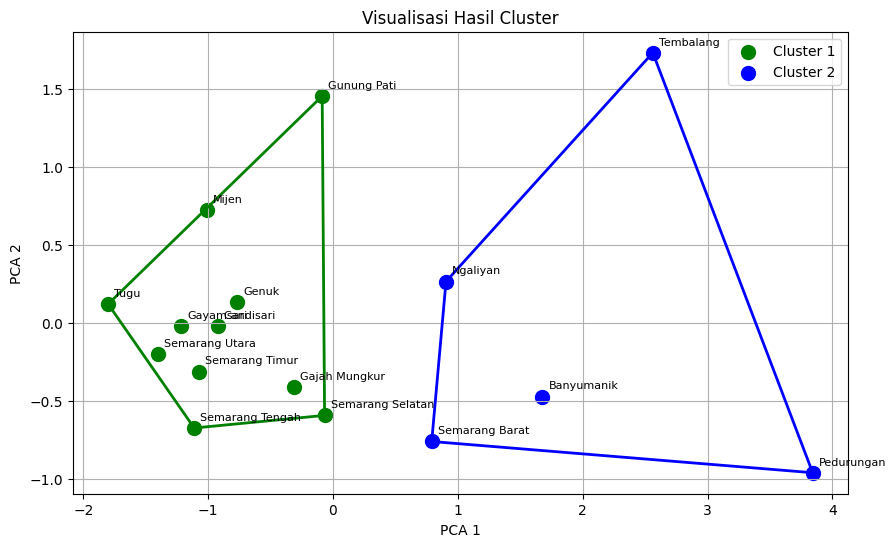

In [ ]:
# PCA ke 2 dimensi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_df)

# Buat dataframe PCA
pca_df = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = df['Cluster']
pca_df['Kecamatan'] = df['Kecamatan']

# Plot
plt.figure(figsize=(10, 6))
colors = ['red', 'green', 'blue']
for i in sorted(pca_df['Cluster'].unique()):
    cluster_points = pca_df[pca_df['Cluster'] == i][['PCA1', 'PCA2']].values
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                label=f'Cluster {i}', color=colors[i], s=100)

    # Buat convex hull jika jumlah titik > 2
    if len(cluster_points) > 2:
        hull = ConvexHull(cluster_points)
        for simplex in hull.simplices:
            plt.plot(cluster_points[simplex, 0], cluster_points[simplex, 1],
                     color=colors[i], linewidth=2)

    # Tampilkan label kecamatan
    for _, row in pca_df[pca_df['Cluster'] == i].iterrows():
        plt.text(row['PCA1']+0.05, row['PCA2']+0.05, row['Kecamatan'], fontsize=8)

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Visualisasi Hasil Cluster')
plt.legend()
plt.grid(True)
plt.show()
